# Group 3 <br>
**Byte Me** <br>
Hijir Della Wirasti <br>
Mauliddinia Iftikhar Agnany <br>
Jericho Medion Haryono <br>
Fakhri Dwi Nugroho <br>
Ryan Nofandi <br>
Johannes Sibarani <br>
Achmad Fichri Rachmadhani <br>
Muhammad Naufal <br>

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [4]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Data

In [6]:
# Load the data from the CSV file
data = pd.read_csv("/Users/mauliddiniaiftikharagnany/Desktop/Data Science/Notebook/home-credit-default-risk/application_train.csv")

# Display the first few rows of the dataset
print("First few rows of the dataset:")
display(data.head())


First few rows of the dataset:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import pandas as pd

# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Tampilkan informasi tentang dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [11]:
import pandas as pd

# Mengatur agar semua kolom muncul dalam .info()
pd.set_option('max_info_columns', 122)  # Sesuaikan dengan jumlah kolom Anda

# Menampilkan info DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# 1. Descriptive Statistics

In [ ]:
# Kolom numerik (int64 dan float64)
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Kolom kategorikal (object)
categorical_columns = data.select_dtypes(include=['object']).columns

# Tampilkan kolom numerik dan kategorikal
print("Kolom Numerik:")
print(numeric_columns)

print("\nKolom Kategorikal:")
print(categorical_columns)


In [19]:
# Mengelompokkan kolom numerik dan kategorikal dari dataset
numerik = [
    'SK_ID_CURR', 
    'TARGET', 
    'CNT_CHILDREN', 
    'AMT_INCOME_TOTAL', 
    'AMT_CREDIT', 
    'AMT_ANNUITY', 
    'AMT_GOODS_PRICE', 
    'REGION_POPULATION_RELATIVE', 
    'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 
    'DAYS_REGISTRATION', 
    'DAYS_ID_PUBLISH', 
    'OWN_CAR_AGE', 
    'CNT_FAM_MEMBERS', 
    'REGION_RATING_CLIENT', 
    'REGION_RATING_CLIENT_W_CITY', 
    'HOUR_APPR_PROCESS_START', 
    'REG_REGION_NOT_LIVE_REGION', 
    'REG_REGION_NOT_WORK_REGION', 
    'LIVE_REGION_NOT_WORK_REGION', 
    'REG_CITY_NOT_LIVE_CITY', 
    'REG_CITY_NOT_WORK_CITY', 
    'LIVE_CITY_NOT_WORK_CITY', 
    'EXT_SOURCE_1', 
    'EXT_SOURCE_2', 
    'EXT_SOURCE_3', 
    'APARTMENTS_AVG', 
    'BASEMENTAREA_AVG', 
    'YEARS_BEGINEXPLUATATION_AVG', 
    'YEARS_BUILD_AVG', 
    'COMMONAREA_AVG', 
    'ELEVATORS_AVG', 
    'ENTRANCES_AVG', 
    'FLOORSMAX_AVG', 
    'FLOORSMIN_AVG', 
    'LANDAREA_AVG', 
    'LIVINGAPARTMENTS_AVG', 
    'LIVINGAREA_AVG', 
    'NONLIVINGAPARTMENTS_AVG', 
    'NONLIVINGAREA_AVG', 
    'APARTMENTS_MODE', 
    'BASEMENTAREA_MODE', 
    'YEARS_BEGINEXPLUATATION_MODE', 
    'YEARS_BUILD_MODE', 
    'COMMONAREA_MODE', 
    'ELEVATORS_MODE', 
    'ENTRANCES_MODE', 
    'FLOORSMAX_MODE', 
    'FLOORSMIN_MODE', 
    'LANDAREA_MODE', 
    'LIVINGAPARTMENTS_MODE', 
    'LIVINGAREA_MODE', 
    'NONLIVINGAPARTMENTS_MODE', 
    'NONLIVINGAREA_MODE', 
    'APARTMENTS_MEDI', 
    'BASEMENTAREA_MEDI', 
    'YEARS_BEGINEXPLUATATION_MEDI', 
    'YEARS_BUILD_MEDI', 
    'COMMONAREA_MEDI', 
    'ELEVATORS_MEDI', 
    'ENTRANCES_MEDI', 
    'FLOORSMAX_MEDI', 
    'FLOORSMIN_MEDI', 
    'LANDAREA_MEDI', 
    'LIVINGAPARTMENTS_MEDI', 
    'LIVINGAREA_MEDI', 
    'NONLIVINGAPARTMENTS_MEDI', 
    'NONLIVINGAREA_MEDI', 
    'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 
    'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 
    'FLAG_DOCUMENT_2', 
    'FLAG_DOCUMENT_3', 
    'FLAG_DOCUMENT_4', 
    'FLAG_DOCUMENT_5', 
    'FLAG_DOCUMENT_6', 
    'FLAG_DOCUMENT_7', 
    'FLAG_DOCUMENT_8', 
    'FLAG_DOCUMENT_9', 
    'FLAG_DOCUMENT_10', 
    'FLAG_DOCUMENT_11', 
    'FLAG_DOCUMENT_12', 
    'FLAG_DOCUMENT_13', 
    'FLAG_DOCUMENT_14', 
    'FLAG_DOCUMENT_15', 
    'FLAG_DOCUMENT_16', 
    'FLAG_DOCUMENT_17', 
    'FLAG_DOCUMENT_18', 
    'FLAG_DOCUMENT_19', 
    'FLAG_DOCUMENT_20', 
    'FLAG_DOCUMENT_21', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]

categorical = [
    'NAME_CONTRACT_TYPE', 
    'CODE_GENDER', 
    'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY', 
    'NAME_TYPE_SUITE', 
    'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 
    'NAME_HOUSING_TYPE', 
    'OCCUPATION_TYPE', 
    'WEEKDAY_APPR_PROCESS_START', 
    'ORGANIZATION_TYPE', 
    'FONDKAPREMONT_MODE', 
    'HOUSETYPE_MODE', 
    'WALLSMATERIAL_MODE', 
    'EMERGENCYSTATE_MODE'
]

# numerik = numericals
# categorical = categoricals

In [21]:
data[numerik].dtypes

SK_ID_CURR                      int64
TARGET                          int64
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 99, dtype: object

In [23]:
# Menghitung jumlah kolom numerik dan kategorikal
jumlah_numerik = len(numerik)
jumlah_kategorical = len(categorical)

jumlah_numerik, jumlah_kategorical


(99, 16)

In [25]:
data[numerik].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.0000

In [26]:
print(data[numerik].describe())

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05  

In [27]:
data[categorical].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [29]:
print(data[categorical].describe())

       NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196

<h2>1. Kolom Numerik: Statistik Deskriptif</h2>
<p>Pada tabel statistik deskriptif untuk kolom numerik, beberapa hal yang bisa kita perhatikan:</p>
<ul>
  <li><strong>TARGET</strong>: Variabel target yang bernilai 0 atau 1. Distribusinya menunjukkan bahwa sekitar 8% data memiliki nilai target 1, yang menunjukkan ketidakseimbangan data (imbalance). Ini perlu diperhatikan dalam pemodelan, terutama untuk klasifikasi.</li>
  
  <li><strong>CNT_CHILDREN</strong>: Jumlah anak yang dimiliki oleh individu. Sebagian besar individu tidak memiliki anak (median = 0), dan jumlah anak terbanyak adalah 19, meskipun ini bisa jadi outlier yang perlu dianalisis lebih lanjut.</li>
  
  <li><strong>AMT_INCOME_TOTAL</strong>: Pendapatan total individu. Rata-rata pendapatan adalah sekitar 168.000 dengan variasi yang cukup besar (standar deviasi 237.000). Ada beberapa nilai yang sangat tinggi (maksimum = 117 juta), yang mungkin merupakan outlier.</li>
  
  <li><strong>AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE</strong>: Ini adalah variabel finansial utama yang mencakup jumlah kredit, anuitas, dan harga barang. Rata-rata kredit adalah sekitar 599.000, dengan rentang nilai yang sangat lebar (mulai dari 45.000 hingga 4 juta).</li>
  
  <li><strong>DAYS_BIRTH</strong>: Merupakan usia individu dalam hari negatif (di mana semakin negatif berarti semakin tua). Median umur sekitar 43 tahun.</li>
  
  <li><strong>DAYS_EMPLOYED</strong>: Banyak nilai yang sangat besar, bahkan positif (seharusnya negatif). Nilai maksimum sebesar 365.243 hari (sekitar 1000 tahun) kemungkinan adalah anomali yang perlu diperiksa lebih lanjut. Median hari bekerja adalah -1213, yang berarti sekitar 3.3 tahun bekerja.</li>
  
  <li><strong>EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3</strong>: Ini mungkin skor kredit eksternal yang digunakan untuk menilai kelayakan kredit individu. Sebagian besar nilai berada dalam kisaran 0 sampai 1, dan ada missing values yang cukup banyak di EXT_SOURCE_1 dan EXT_SOURCE_3.</li>
  
  <li><strong>Variabel bangunan (APARTMENTS_AVG, BASEMENTAREA_AVG, dll.)</strong>: Ini adalah variabel yang menggambarkan properti bangunan, seperti luas apartemen, area basement, dan sebagainya. Banyak dari variabel ini memiliki missing values yang besar.</li>
</ul>

<h2>2. Kolom Kategorikal: Statistik Deskriptif</h2>
<p>Pada kolom kategorikal, kita bisa melihat beberapa pola menarik:</p>
<ul>
  <li><strong>NAME_CONTRACT_TYPE</strong>: Ada dua jenis kontrak, dengan mayoritas adalah "Cash loans" (sekitar 90% dari total kontrak).</li>
  
  <li><strong>CODE_GENDER</strong>: Ada 3 nilai unik, yang paling umum adalah F (female). Ini menunjukkan mayoritas pemohon adalah wanita.</li>
  
  <li><strong>FLAG_OWN_CAR</strong> dan <strong>FLAG_OWN_REALTY</strong>: Kedua kolom ini menunjukkan apakah individu memiliki mobil dan properti real estate. Sebagian besar individu tidak memiliki mobil (sekitar 66%) tetapi memiliki properti (sekitar 70%).</li>
  
  <li><strong>NAME_INCOME_TYPE</strong>: Jenis pendapatan mayoritas adalah "Working" (pekerja), tetapi ada juga kategori lain seperti pensiunan, pengusaha, dan sebagainya.</li>
  
  <li><strong>OCCUPATION_TYPE</strong>: Menariknya, ada banyak missing values pada kolom ini (sekitar 100.000 missing), tetapi mayoritas dari yang ada adalah "Laborers" (buruh).</li>
  
  <li><strong>WEEKDAY_APPR_PROCESS_START</strong>: Hari ketika proses aplikasi dimulai, dengan mayoritas aplikasi diproses pada hari Selasa.</li>
  
  <li><strong>ORGANIZATION_TYPE</strong>: Ada banyak jenis organisasi yang dimasukkan (58 jenis), tetapi "Business Entity Type 3" adalah yang paling umum.</li>
  
  <li><strong>FONDKAPREMONT_MODE</strong>: Ini mungkin terkait dengan program pemeliharaan bangunan, dan mayoritasnya adalah "reg oper account".</li>
  
  <li><strong>HOUSETYPE_MODE</strong>: Mayoritas individu tinggal di "block of flats" (apartemen bertingkat).</li>
  
  <li><strong>WALLSMATERIAL_MODE</strong>: Jenis material dinding, di mana mayoritas adalah "Panel".</li>
  
  <li><strong>EMERGENCYSTATE_MODE</strong>: Menunjukkan apakah individu berada dalam kondisi darurat, mayoritas adalah "No".</li>
</ul>

<h2>3. Missing Values</h2>
<ul>
  <li>Beberapa kolom seperti <strong>OWN_CAR_AGE</strong>, <strong>OCCUPATION_TYPE</strong>, <strong>EXT_SOURCE_1</strong>, dan variabel properti seperti <strong>APARTMENTS_AVG</strong> memiliki missing values yang signifikan. Anda mungkin ingin mempertimbangkan strategi untuk menangani missing values ini, misalnya dengan mengimputasi nilai, menghapus kolom, atau mengganti nilai dengan rata-rata atau median.</li>
</ul>

<h2>4. Potensi Anomali atau Outliers</h2>
<ul>
  <li>Nilai yang sangat tinggi atau sangat rendah pada beberapa variabel menunjukkan adanya outliers atau anomali, seperti pada kolom <strong>DAYS_EMPLOYED</strong>, <strong>AMT_INCOME_TOTAL</strong>, dan <strong>CNT_CHILDREN</strong>. Outliers ini perlu diperhatikan dalam analisis atau mungkin perlu dibersihkan sebelum melakukan pemodelan.</li>
</ul>

<h2>5. Kategori yang Imbalance</h2>
<ul>
  <li>Pada beberapa variabel kategorikal, distribusi kategori sangat tidak seimbang, seperti pada <strong>TARGET</strong> (yang sangat banyak memiliki nilai 0), <strong>CODE_GENDER</strong> (lebih banyak wanita), dan <strong>NAME_CONTRACT_TYPE</strong> (lebih banyak "Cash loans"). Ini perlu diperhatikan karena dapat mempengaruhi hasil pemodelan, terutama jika menggunakan metode supervised learning seperti klasifikasi.</li>
</ul>

<h2>Kesimpulan</h2>
<p>Dataset ini cukup kompleks dengan variasi tipe data numerik dan kategorikal. Terdapat banyak missing values dan beberapa outliers atau anomali yang memerlukan penanganan. Selain itu, terdapat beberapa ketidakseimbangan (imbalanced classes) yang perlu dipertimbangkan dalam analisis lebih lanjut, terutama dalam pemodelan prediktif seperti klasifikasi. Sebagai langkah selanjutnya, Anda mungkin ingin membersihkan data, mengimputasi missing values, serta melakukan eksplorasi lebih dalam terhadap hubungan antara variabel-variabel penting dan variabel target.</p>


### B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?

In [45]:
import pandas as pd

# Mengatur pandas agar menampilkan seluruh kolom dan baris
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Menampilkan jumlah nilai null per kolom
print(data.isna().sum())


SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

<h2>Kolom dengan Nilai Kosong (Null) dan Jumlahnya:</h2>

<ul>
  <li><strong>AMT_ANNUITY</strong>: 12 nilai null</li>
  <li><strong>AMT_GOODS_PRICE</strong>: 278 nilai null</li>
  <li><strong>NAME_TYPE_SUITE</strong>: 1.292 nilai null</li>
  <li><strong>OWN_CAR_AGE</strong>: 202.929 nilai null</li>
  <li><strong>OCCUPATION_TYPE</strong>: 96.391 nilai null</li>
  <li><strong>CNT_FAM_MEMBERS</strong>: 2 nilai null</li>
  <li><strong>EXT_SOURCE_1</strong>: 173.378 nilai null</li>
  <li><strong>EXT_SOURCE_2</strong>: 660 nilai null</li>
  <li><strong>EXT_SOURCE_3</strong>: 60.965 nilai null</li>
  <li><strong>APARTMENTS_AVG</strong>: 156.061 nilai null</li>
  <li><strong>BASEMENTAREA_AVG</strong>: 179.943 nilai null</li>
  <li><strong>YEARS_BEGINEXPLUATATION_AVG</strong>: 150.007 nilai null</li>
  <li><strong>YEARS_BUILD_AVG</strong>: 204.488 nilai null</li>
  <li><strong>COMMONAREA_AVG</strong>: 214.865 nilai null</li>
  <li><strong>ELEVATORS_AVG</strong>: 163.891 nilai null</li>
  <li><strong>ENTRANCES_AVG</strong>: 154.828 nilai null</li>
  <li><strong>FLOORSMAX_AVG</strong>: 153.020 nilai null</li>
  <li><strong>FLOORSMIN_AVG</strong>: 208.642 nilai null</li>
  <li><strong>LANDAREA_AVG</strong>: 182.590 nilai null</li>
  <li><strong>LIVINGAPARTMENTS_AVG</strong>: 210.199 nilai null</li>
  <li><strong>LIVINGAREA_AVG</strong>: 154.350 nilai null</li>
  <li><strong>NONLIVINGAPARTMENTS_AVG</strong>: 213.514 nilai null</li>
  <li><strong>NONLIVINGAREA_AVG</strong>: 169.682 nilai null</li>
  <li><strong>APARTMENTS_MODE</strong>: 156.061 nilai null</li>
  <li><strong>BASEMENTAREA_MODE</strong>: 179.943 nilai null</li>
  <li><strong>YEARS_BEGINEXPLUATATION_MODE</strong>: 150.007 nilai null</li>
  <li><strong>YEARS_BUILD_MODE</strong>: 204.488 nilai null</li>
  <li><strong>COMMONAREA_MODE</strong>: 214.865 nilai null</li>
  <li><strong>ELEVATORS_MODE</strong>: 163.891 nilai null</li>
  <li><strong>ENTRANCES_MODE</strong>: 154.828 nilai null</li>
  <li><strong>FLOORSMAX_MODE</strong>: 153.020 nilai null</li>
  <li><strong>FLOORSMIN_MODE</strong>: 208.642 nilai null</li>
  <li><strong>LANDAREA_MODE</strong>: 182.590 nilai null</li>
  <li><strong>LIVINGAPARTMENTS_MODE</strong>: 210.199 nilai null</li>
  <li><strong>LIVINGAREA_MODE</strong>: 154.350 nilai null</li>
  <li><strong>NONLIVINGAPARTMENTS_MODE</strong>: 213.514 nilai null</li>
  <li><strong>NONLIVINGAREA_MODE</strong>: 169.682 nilai null</li>
  <li><strong>APARTMENTS_MEDI</strong>: 156.061 nilai null</li>
  <li><strong>BASEMENTAREA_MEDI</strong>: 179.943 nilai null</li>
  <li><strong>YEARS_BEGINEXPLUATATION_MEDI</strong>: 150.007 nilai null</li>
  <li><strong>YEARS_BUILD_MEDI</strong>: 204.488 nilai null</li>
  <li><strong>COMMONAREA_MEDI</strong>: 214.865 nilai null</li>
  <li><strong>ELEVATORS_MEDI</strong>: 163.891 nilai null</li>
  <li><strong>ENTRANCES_MEDI</strong>: 154.828 nilai null</li>
  <li><strong>FLOORSMAX_MEDI</strong>: 153.020 nilai null</li>
  <li><strong>FLOORSMIN_MEDI</strong>: 208.642 nilai null</li>
  <li><strong>LANDAREA_MEDI</strong>: 182.590 nilai null</li>
  <li><strong>LIVINGAPARTMENTS_MEDI</strong>: 210.199 nilai null</li>
  <li><strong>LIVINGAREA_MEDI</strong>: 154.350 nilai null</li>
  <li><strong>NONLIVINGAPARTMENTS_MEDI</strong>: 213.514 nilai null</li>
  <li><strong>NONLIVINGAREA_MEDI</strong>: 169.682 nilai null</li>
  <li><strong>FONDKAPREMONT_MODE</strong>: 210.295 nilai null</li>
  <li><strong>HOUSETYPE_MODE</strong>: 154.297 nilai null</li>
  <li><strong>TOTALAREA_MODE</strong>: 148.431 nilai null</li>
  <li><strong>WALLSMATERIAL_MODE</strong>: 156.341 nilai null</li>
  <li><strong>EMERGENCYSTATE_MODE</strong>: 145.755 nilai null</li>
  <li><strong>OBS_30_CNT_SOCIAL_CIRCLE</strong>: 1.021 nilai null</li>
  <li><strong>DEF_30_CNT_SOCIAL_CIRCLE</strong>: 1.021 nilai null</li>
  <li><strong>OBS_60_CNT_SOCIAL_CIRCLE</strong>: 1.021 nilai null</li>
  <li><strong>DEF_60_CNT_SOCIAL_CIRCLE</strong>: 1.021 nilai null</li>
  <li><strong>DAYS_LAST_PHONE_CHANGE</strong>: 1 nilai null</li>
  <li><strong>AMT_REQ_CREDIT_BUREAU_HOUR</strong>: 41.519 nilai null</li>
  <li><strong>AMT_REQ_CREDIT_BUREAU_DAY</strong>: 41.519 nilai null</li>
  <li><strong>AMT_REQ_CREDIT_BUREAU_WEEK</strong>: 41.519 nilai null</li>
  <li><strong>AMT_REQ_CREDIT_BUREAU_MON</strong>: 41.519 nilai null</li>
  <li><strong>AMT_REQ_CREDIT_BUREAU_QRT</strong>: 41.519 nilai null</li>
  <li><strong>AMT_REQ_CREDIT_BUREAU_YEAR</strong>: 41.519 nilai null</li>
</ul>

<h2>Analisis Singkat:</h2>
<ul>
  <li><strong>Kolom Finansial</strong> seperti <strong>AMT_ANNUITY</strong>, <strong>AMT_GOODS_PRICE</strong>, dan <strong>AMT_CREDIT</strong> memiliki beberapa nilai yang hilang, tetapi jumlahnya relatif kecil dibandingkan total baris (sekitar 300.000 baris).</li>
  <li><strong>Kolom Properti/Bangunan</strong> seperti <strong>APARTMENTS_AVG</strong>, <strong>BASEMENTAREA_AVG</strong>, <strong>ELEVATORS_AVG</strong> memiliki banyak missing values, yang mengindikasikan bahwa informasi mengenai properti ini mungkin tidak tersedia untuk banyak individu.</li>
  <li><strong>Kolom Temporal</strong> seperti <strong>OWN_CAR_AGE</strong> dan <strong>Sumber Eksternal</strong> seperti <strong>EXT_SOURCE_1</strong> memiliki jumlah nilai yang hilang cukup besar, yang memerlukan penanganan lebih lanjut dalam proses analisis data.</li>
  <li>Kolom yang terkait dengan permintaan kredit dari biro kredit (<strong>AMT_REQ_CREDIT_BUREAU_</strong> series) juga memiliki jumlah missing values yang cukup signifikan (41.519 missing values).</li>
</ul>


In [49]:
import pandas as pd

# Total number of rows in the dataset (per information provided above)
total_rows = 307511

# Dictionary with column names and their corresponding missing values
missing_values = {
    'AMT_ANNUITY': 12,
    'AMT_GOODS_PRICE': 278,
    'NAME_TYPE_SUITE': 1292,
    'OWN_CAR_AGE': 202929,
    'OCCUPATION_TYPE': 96391,
    'CNT_FAM_MEMBERS': 2,
    'EXT_SOURCE_1': 173378,
    'EXT_SOURCE_2': 660,
    'EXT_SOURCE_3': 60965,
    'APARTMENTS_AVG': 156061,
    'BASEMENTAREA_AVG': 179943,
    'YEARS_BEGINEXPLUATATION_AVG': 150007,
    'YEARS_BUILD_AVG': 204488,
    'COMMONAREA_AVG': 214865,
    'ELEVATORS_AVG': 163891,
    'ENTRANCES_AVG': 154828,
    'FLOORSMAX_AVG': 153020,
    'FLOORSMIN_AVG': 208642,
    'LANDAREA_AVG': 182590,
    'LIVINGAPARTMENTS_AVG': 210199,
    'LIVINGAREA_AVG': 154350,
    'NONLIVINGAPARTMENTS_AVG': 213514,
    'NONLIVINGAREA_AVG': 169682,
    'APARTMENTS_MODE': 156061,
    'BASEMENTAREA_MODE': 179943,
    'YEARS_BEGINEXPLUATATION_MODE': 150007,
    'YEARS_BUILD_MODE': 204488,
    'COMMONAREA_MODE': 214865,
    'ELEVATORS_MODE': 163891,
    'ENTRANCES_MODE': 154828,
    'FLOORSMAX_MODE': 153020,
    'FLOORSMIN_MODE': 208642,
    'LANDAREA_MODE': 182590,
    'LIVINGAPARTMENTS_MODE': 210199,
    'LIVINGAREA_MODE': 154350,
    'NONLIVINGAPARTMENTS_MODE': 213514,
    'NONLIVINGAREA_MODE': 169682,
    'APARTMENTS_MEDI': 156061,
    'BASEMENTAREA_MEDI': 179943,
    'YEARS_BEGINEXPLUATATION_MEDI': 150007,
    'YEARS_BUILD_MEDI': 204488,
    'COMMONAREA_MEDI': 214865,
    'ELEVATORS_MEDI': 163891,
    'ENTRANCES_MEDI': 154828,
    'FLOORSMAX_MEDI': 153020,
    'FLOORSMIN_MEDI': 208642,
    'LANDAREA_MEDI': 182590,
    'LIVINGAPARTMENTS_MEDI': 210199,
    'LIVINGAREA_MEDI': 154350,
    'NONLIVINGAPARTMENTS_MEDI': 213514,
    'NONLIVINGAREA_MEDI': 169682,
    'FONDKAPREMONT_MODE': 210295,
    'HOUSETYPE_MODE': 154297,
    'TOTALAREA_MODE': 148431,
    'WALLSMATERIAL_MODE': 156341,
    'EMERGENCYSTATE_MODE': 145755,
    'OBS_30_CNT_SOCIAL_CIRCLE': 1021,
    'DEF_30_CNT_SOCIAL_CIRCLE': 1021,
    'OBS_60_CNT_SOCIAL_CIRCLE': 1021,
    'DEF_60_CNT_SOCIAL_CIRCLE': 1021,
    'DAYS_LAST_PHONE_CHANGE': 1,
    'AMT_REQ_CREDIT_BUREAU_HOUR': 41519,
    'AMT_REQ_CREDIT_BUREAU_DAY': 41519,
    'AMT_REQ_CREDIT_BUREAU_WEEK': 41519,
    'AMT_REQ_CREDIT_BUREAU_MON': 41519,
    'AMT_REQ_CREDIT_BUREAU_QRT': 41519,
    'AMT_REQ_CREDIT_BUREAU_YEAR': 41519
}

# df dan hitung presentase
missing_df = pd.DataFrame(list(missing_values.items()), columns=['Column', 'Missing Values'])
missing_df['Percentage Missing'] = (missing_df['Missing Values'] / total_rows) * 100

# Klasifikasi tindakan
def classify_action(percentage):
    if percentage <= 5:
        return 'Drop rows'
    elif percentage <= 20:
        return 'Fill with median'
    else:
        return 'Drop column'

# Terapkan klasifikasi
missing_df['Action'] = missing_df['Percentage Missing'].apply(classify_action)

# Display the DataFrame
missing_df


,Column,Missing Values,Percentage Missing,Action
0,AMT_ANNUITY,12,0.003902,Drop rows
1,AMT_GOODS_PRICE,278,0.090403,Drop rows
2,NAME_TYPE_SUITE,1292,0.420148,Drop rows
3,OWN_CAR_AGE,202929,65.990810,Drop column
4,OCCUPATION_TYPE,96391,31.345545,Drop column
5,CNT_FAM_MEMBERS,2,0.000650,Drop rows
6,EXT_SOURCE_1,173378,56.381073,Drop column
7,EXT_SOURCE_2,660,0.214626,Drop rows
8,EXT_SOURCE_3,60965,19.825307,Fill with median
9,APARTMENTS_AVG,156061,50.749729,Drop column


### C. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq) 

<h3>Observasi Terhadap Nilai Summary yang Mungkin Memerlukan Perhatian:</h3>

<h4>1. DAYS_EMPLOYED:</h4>
<ul>
    <li><strong>Min:</strong> -17,912, <strong>Max:</strong> 365,243</li>
    <li>Nilai maksimum dari kolom ini tampak sangat besar dan tidak realistis untuk menunjukkan lamanya hari bekerja (365,243 hari = lebih dari 1000 tahun). Ini mungkin menunjukkan bahwa ada pengkodean yang tidak lazim untuk beberapa nilai.</li>
    <li>Anda mungkin perlu mengidentifikasi nilai anomali ini (misalnya, nilai yang sangat besar) dan mempertimbangkan untuk mengganti atau memperlakukan nilai-nilai tersebut secara khusus.</li>
</ul>

<h4>2. OWN_CAR_AGE:</h4>
<ul>
    <li><strong>Non-Null Count:</strong> 104,582 dari 307,511, yang berarti sekitar 66% data kosong.</li>
    <li>Nilai <strong>maksimum</strong> 91 tahun tampak sangat besar untuk umur mobil. Perlu dicermati apakah nilai ini valid atau ada kesalahan input.</li>
</ul>

<h4>3. EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3:</h4>
<ul>
    <li>Kolom <strong>EXT_SOURCE_1</strong> memiliki banyak nilai kosong (sekitar 56% data kosong).</li>
    <li>Selain itu, nilai minimum <strong>EXT_SOURCE_2</strong> adalah 8.17e-08, yang sangat kecil dan mungkin menunjukkan outlier atau kesalahan input.</li>
    <li>Anda mungkin perlu mengevaluasi distribusi nilai-nilai ini untuk mengidentifikasi outlier.</li>
</ul>

<h4>4. APARTMENTS_AVG, BASEMENTAREA_AVG, COMMONAREA_AVG, ELEVATORS_AVG:</h4>
<ul>
    <li>Banyak kolom yang terkait dengan properti real estat memiliki jumlah <strong>null</strong> yang sangat tinggi, seperti <strong>COMMONAREA_AVG</strong> (sekitar 70% data kosong) dan <strong>BASEMENTAREA_AVG</strong> (58% kosong).</li>
    <li>Anda perlu memutuskan apakah ingin menghapus kolom-kolom ini atau mengisinya dengan nilai tertentu.</li>
</ul>

<h4>5. OCCUPATION_TYPE:</h4>
<ul>
    <li>Kolom ini memiliki sekitar 31% data kosong. Jika memungkinkan, Anda bisa mengganti nilai kosong dengan kategori yang lebih umum seperti "Unknown" atau "Other" jika data ini penting untuk model Anda.</li>
</ul>

<h4>6. Kolom dengan Data Sosial Circle (OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, dll):</h4>
<ul>
    <li><strong>Max</strong> di beberapa kolom sosial ini sangat tinggi, seperti <strong>OBS_30_CNT_SOCIAL_CIRCLE</strong> yang memiliki nilai maksimum 348. Ini tampak terlalu besar dan mungkin merupakan outlier.</li>
</ul>

<h4>7. FLAG_DOCUMENT Columns:</h4>
<ul>
    <li>Semua kolom <strong>FLAG_DOCUMENT</strong> memiliki rentang nilai hanya 0 dan 1, yang tampak normal mengingat kolom ini mungkin adalah kolom biner.</li>
    <li>Namun, pastikan bahwa Anda memahami konteks setiap kolom untuk memastikan validitas data.</li>
</ul>

<h4>8. DAYS_LAST_PHONE_CHANGE:</h4>
<ul>
    <li>Kolom ini memiliki <strong>min</strong> -4292, yang menunjukkan perubahan telepon terjadi lebih dari 11 tahun yang lalu. Ini tampak aneh, mungkin ada kesalahan pengkodean untuk data negatif.</li>
</ul>

<p>Anda mungkin ingin melakukan pengecekan lebih lanjut terhadap kolom-kolom ini dan mungkin melakukan pembersihan atau perlakuan khusus pada nilai yang tampak tidak logis atau terlalu ekstrim (outlier).</p>


## Pendekatan Grafis

### Univariate Analysis (20 Poin)

Univariate analysis adalah analisis yang hanya melibatkan satu variabel pada satu waktu. Untuk univariate analysis ini, kita akan melihat distribusi dari setiap kolom dalam dataset, baik untuk kolom numerik maupun kategorikal.

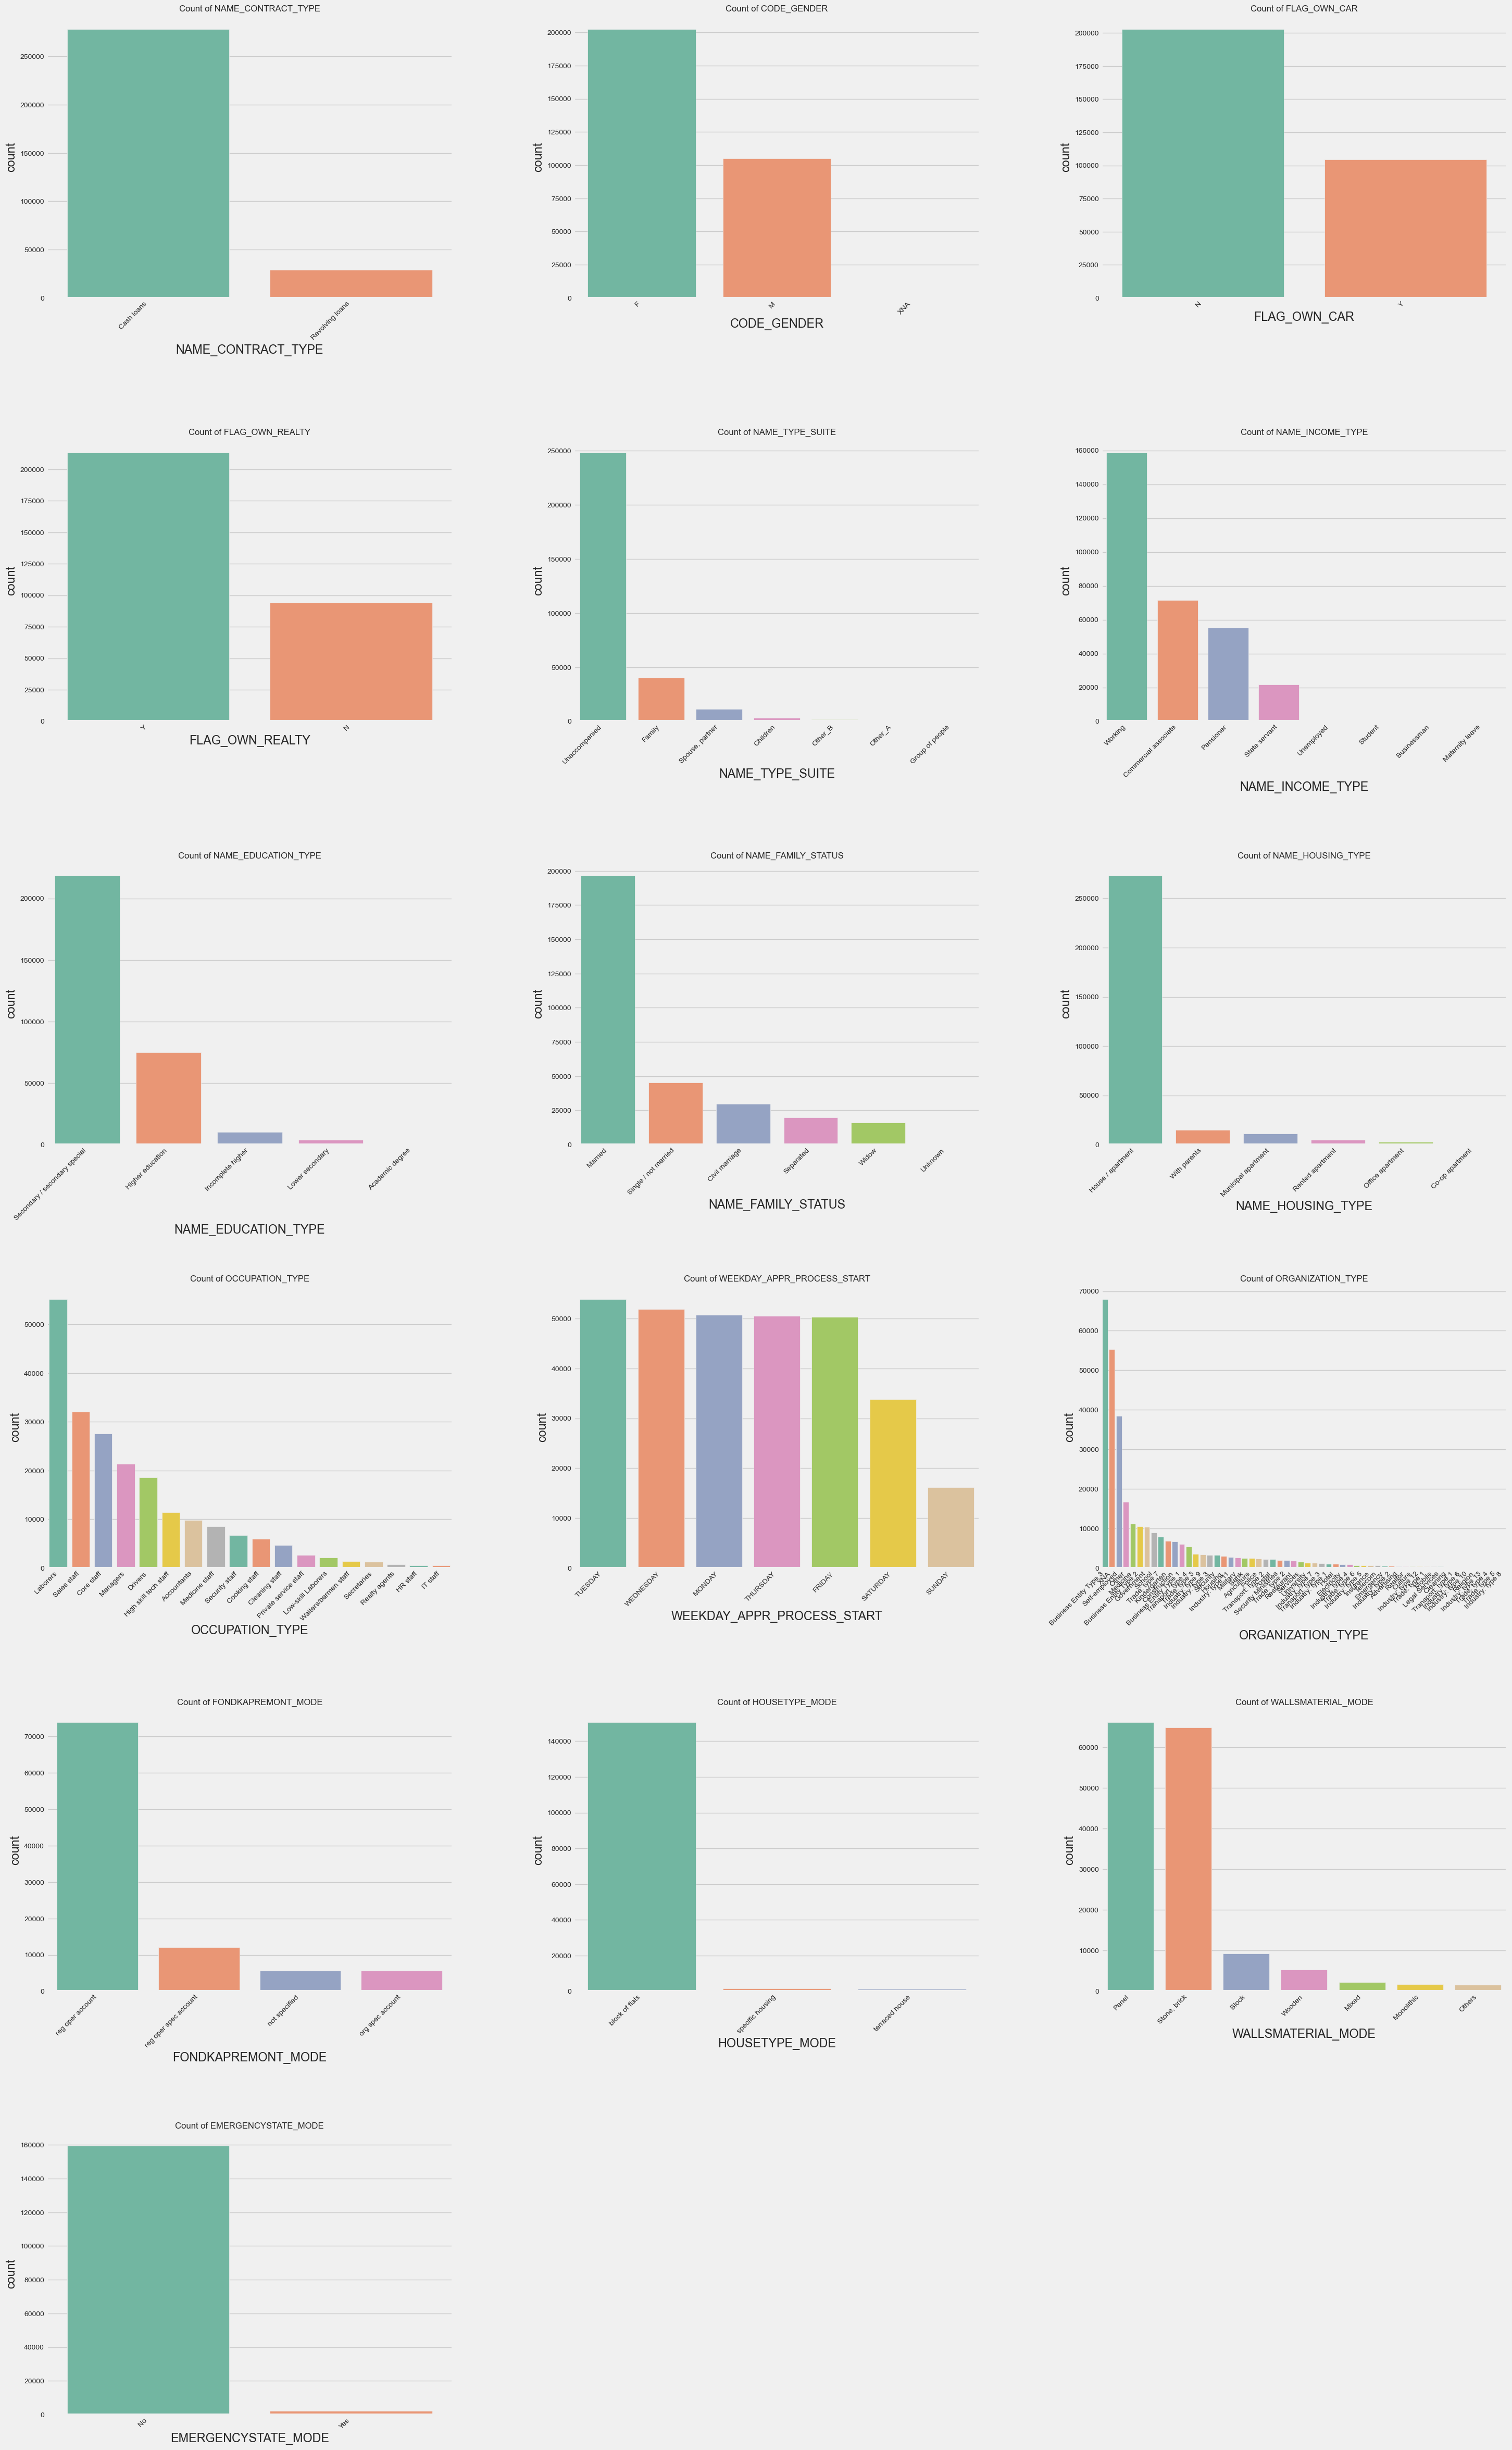

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Univariate Analysis untuk kolom kategorikal
def univariate_analysis_categorical(data, categorical_columns):
    # Tentukan ukuran gambar yang lebih besar
    plt.figure(figsize=(30, len(categorical_columns) * 3))
    
    # Loop melalui kolom kategorikal dan buat barplot
    for i, column in enumerate(categorical_columns):
        plt.subplot(len(categorical_columns) // 3 + 1, 3, i + 1)  # Atur plot dalam grid 3 kolom
        sns.countplot(x=data[column], palette='Set2', order=data[column].value_counts().index)
        plt.title(f"Count of {column}", fontsize=12)  # Ukuran font judul lebih kecil
        plt.xticks(rotation=45, ha='right', fontsize=10)  # Ukuran font sumbu X lebih kecil
        plt.yticks(fontsize=10)  # Ukuran font sumbu Y lebih kecil
        plt.tight_layout(pad=3.0)  # Berikan jarak antar subplot untuk keterbacaan

    # Atur jarak antar subplot (space vertikal dan horizontal)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace untuk jarak vertikal, wspace untuk jarak horizontal
    
    plt.show()

# Panggil fungsi dengan kolom kategorikal
univariate_analysis_categorical(data, categorical)


<h2>Interpretasi Hasil Univariate Analysis pada Kolom Kategorikal</h2>

<ul>
    <li><strong>NAME_CONTRACT_TYPE:</strong>
        <p>Mayoritas pelanggan mengambil "Cash loans" dibandingkan dengan "Revolving loans". Ini menunjukkan bahwa kebanyakan orang cenderung mengambil pinjaman kas dibandingkan pinjaman bergulir.</p>
    </li>
    <li><strong>CODE_GENDER:</strong>
        <p>Sebagian besar pelanggan berjenis kelamin perempuan (F), dengan sebagian kecil laki-laki (M), serta ada sejumlah kecil nilai yang tidak diketahui (XNA).</p>
    </li>
    <li><strong>FLAG_OWN_CAR:</strong>
        <p>Lebih banyak pelanggan tidak memiliki mobil dibandingkan mereka yang memiliki mobil. Ini menunjukkan bahwa mayoritas pelanggan tidak memiliki aset berupa mobil.</p>
    </li>
    <li><strong>FLAG_OWN_REALTY:</strong>
        <p>Sebagian besar pelanggan memiliki properti (realty). Ini bisa menandakan bahwa pelanggan yang memiliki properti mungkin memiliki stabilitas finansial yang lebih baik.</p>
    </li>
    <li><strong>NAME_TYPE_SUITE:</strong>
        <p>Sebagian besar aplikasi pinjaman diajukan oleh pelanggan yang tidak ditemani (Unaccompanied). Jenis pendamping lainnya seperti keluarga, pasangan, atau orang tua lebih sedikit.</p>
    </li>
    <li><strong>NAME_INCOME_TYPE:</strong>
        <p>Sebagian besar pelanggan adalah pekerja (Working), diikuti oleh kelompok pensiunan (Pensioner). Ada juga kelompok kecil yang merupakan pengusaha, siswa, dan lain-lain.</p>
    </li>
    <li><strong>NAME_EDUCATION_TYPE:</strong>
        <p>Sebagian besar pelanggan memiliki pendidikan tingkat menengah (Secondary / secondary special), diikuti oleh pelanggan dengan pendidikan tinggi. Hanya sebagian kecil yang memiliki gelar akademik atau pendidikan yang lebih rendah.</p>
    </li>
    <li><strong>NAME_FAMILY_STATUS:</strong>
        <p>Mayoritas pelanggan adalah yang sudah menikah (Married), diikuti oleh mereka yang belum menikah (Single / not married). Hanya sedikit yang berada dalam status perkawinan lain seperti bercerai atau janda/duda.</p>
    </li>
    <li><strong>NAME_HOUSING_TYPE:</strong>
        <p>Sebagian besar pelanggan tinggal di apartemen (House / apartment), sementara sebagian kecil tinggal dengan orang tua atau di jenis hunian lainnya.</p>
    </li>
    <li><strong>OCCUPATION_TYPE:</strong>
        <p>Profesi yang paling umum adalah buruh kasar (Laborers), diikuti oleh staf kantor (Core staff) dan penjualan (Sales staff). Profesi lain seperti manajer dan tenaga profesional cenderung lebih sedikit.</p>
    </li>
    <li><strong>WEEKDAY_APPR_PROCESS_START:</strong>
        <p>Pengajuan pinjaman paling banyak dilakukan pada hari Selasa dan Rabu, sementara hari Minggu adalah hari dengan pengajuan paling sedikit.</p>
    </li>
    <li><strong>ORGANIZATION_TYPE:</strong>
        <p>Jenis organisasi yang paling sering muncul adalah "Business Entity Type 3", diikuti oleh berbagai jenis organisasi lain dengan frekuensi yang lebih rendah. Ini menunjukkan bahwa sebagian besar pelanggan bekerja di entitas bisnis, meskipun ada banyak variasi dalam jenis organisasi.</p>
    </li>
    <li><strong>FONDKAPREMONT_MODE:</strong>
        <p>Sebagian besar properti memiliki dana cadangan operasional (reg oper account), sementara sebagian kecil tidak ada dana cadangan atau dikelola dengan cara lain.</p>
    </li>
    <li><strong>HOUSETYPE_MODE:</strong>
        <p>Sebagian besar pelanggan tinggal di flat (block of flats), sementara sangat sedikit yang tinggal di rumah spesifik lainnya seperti rumah terpisah atau rumah terpisah kecil.</p>
    </li>
    <li><strong>WALLSMATERIAL_MODE:</strong>
        <p>Material dinding yang paling umum digunakan adalah "Panel" dan "Stone/brick", sementara material lain seperti "Block", "Wooden", dan lain-lain lebih jarang digunakan.</p>
    </li>
    <li><strong>EMERGENCYSTATE_MODE:</strong>
        <p>Sebagian besar pelanggan tidak dalam kondisi darurat (No), sementara ada sebagian kecil yang berada dalam kondisi darurat (Yes).</p>
    </li>
</ul>


### Multivariate Analysis (10 Poin)

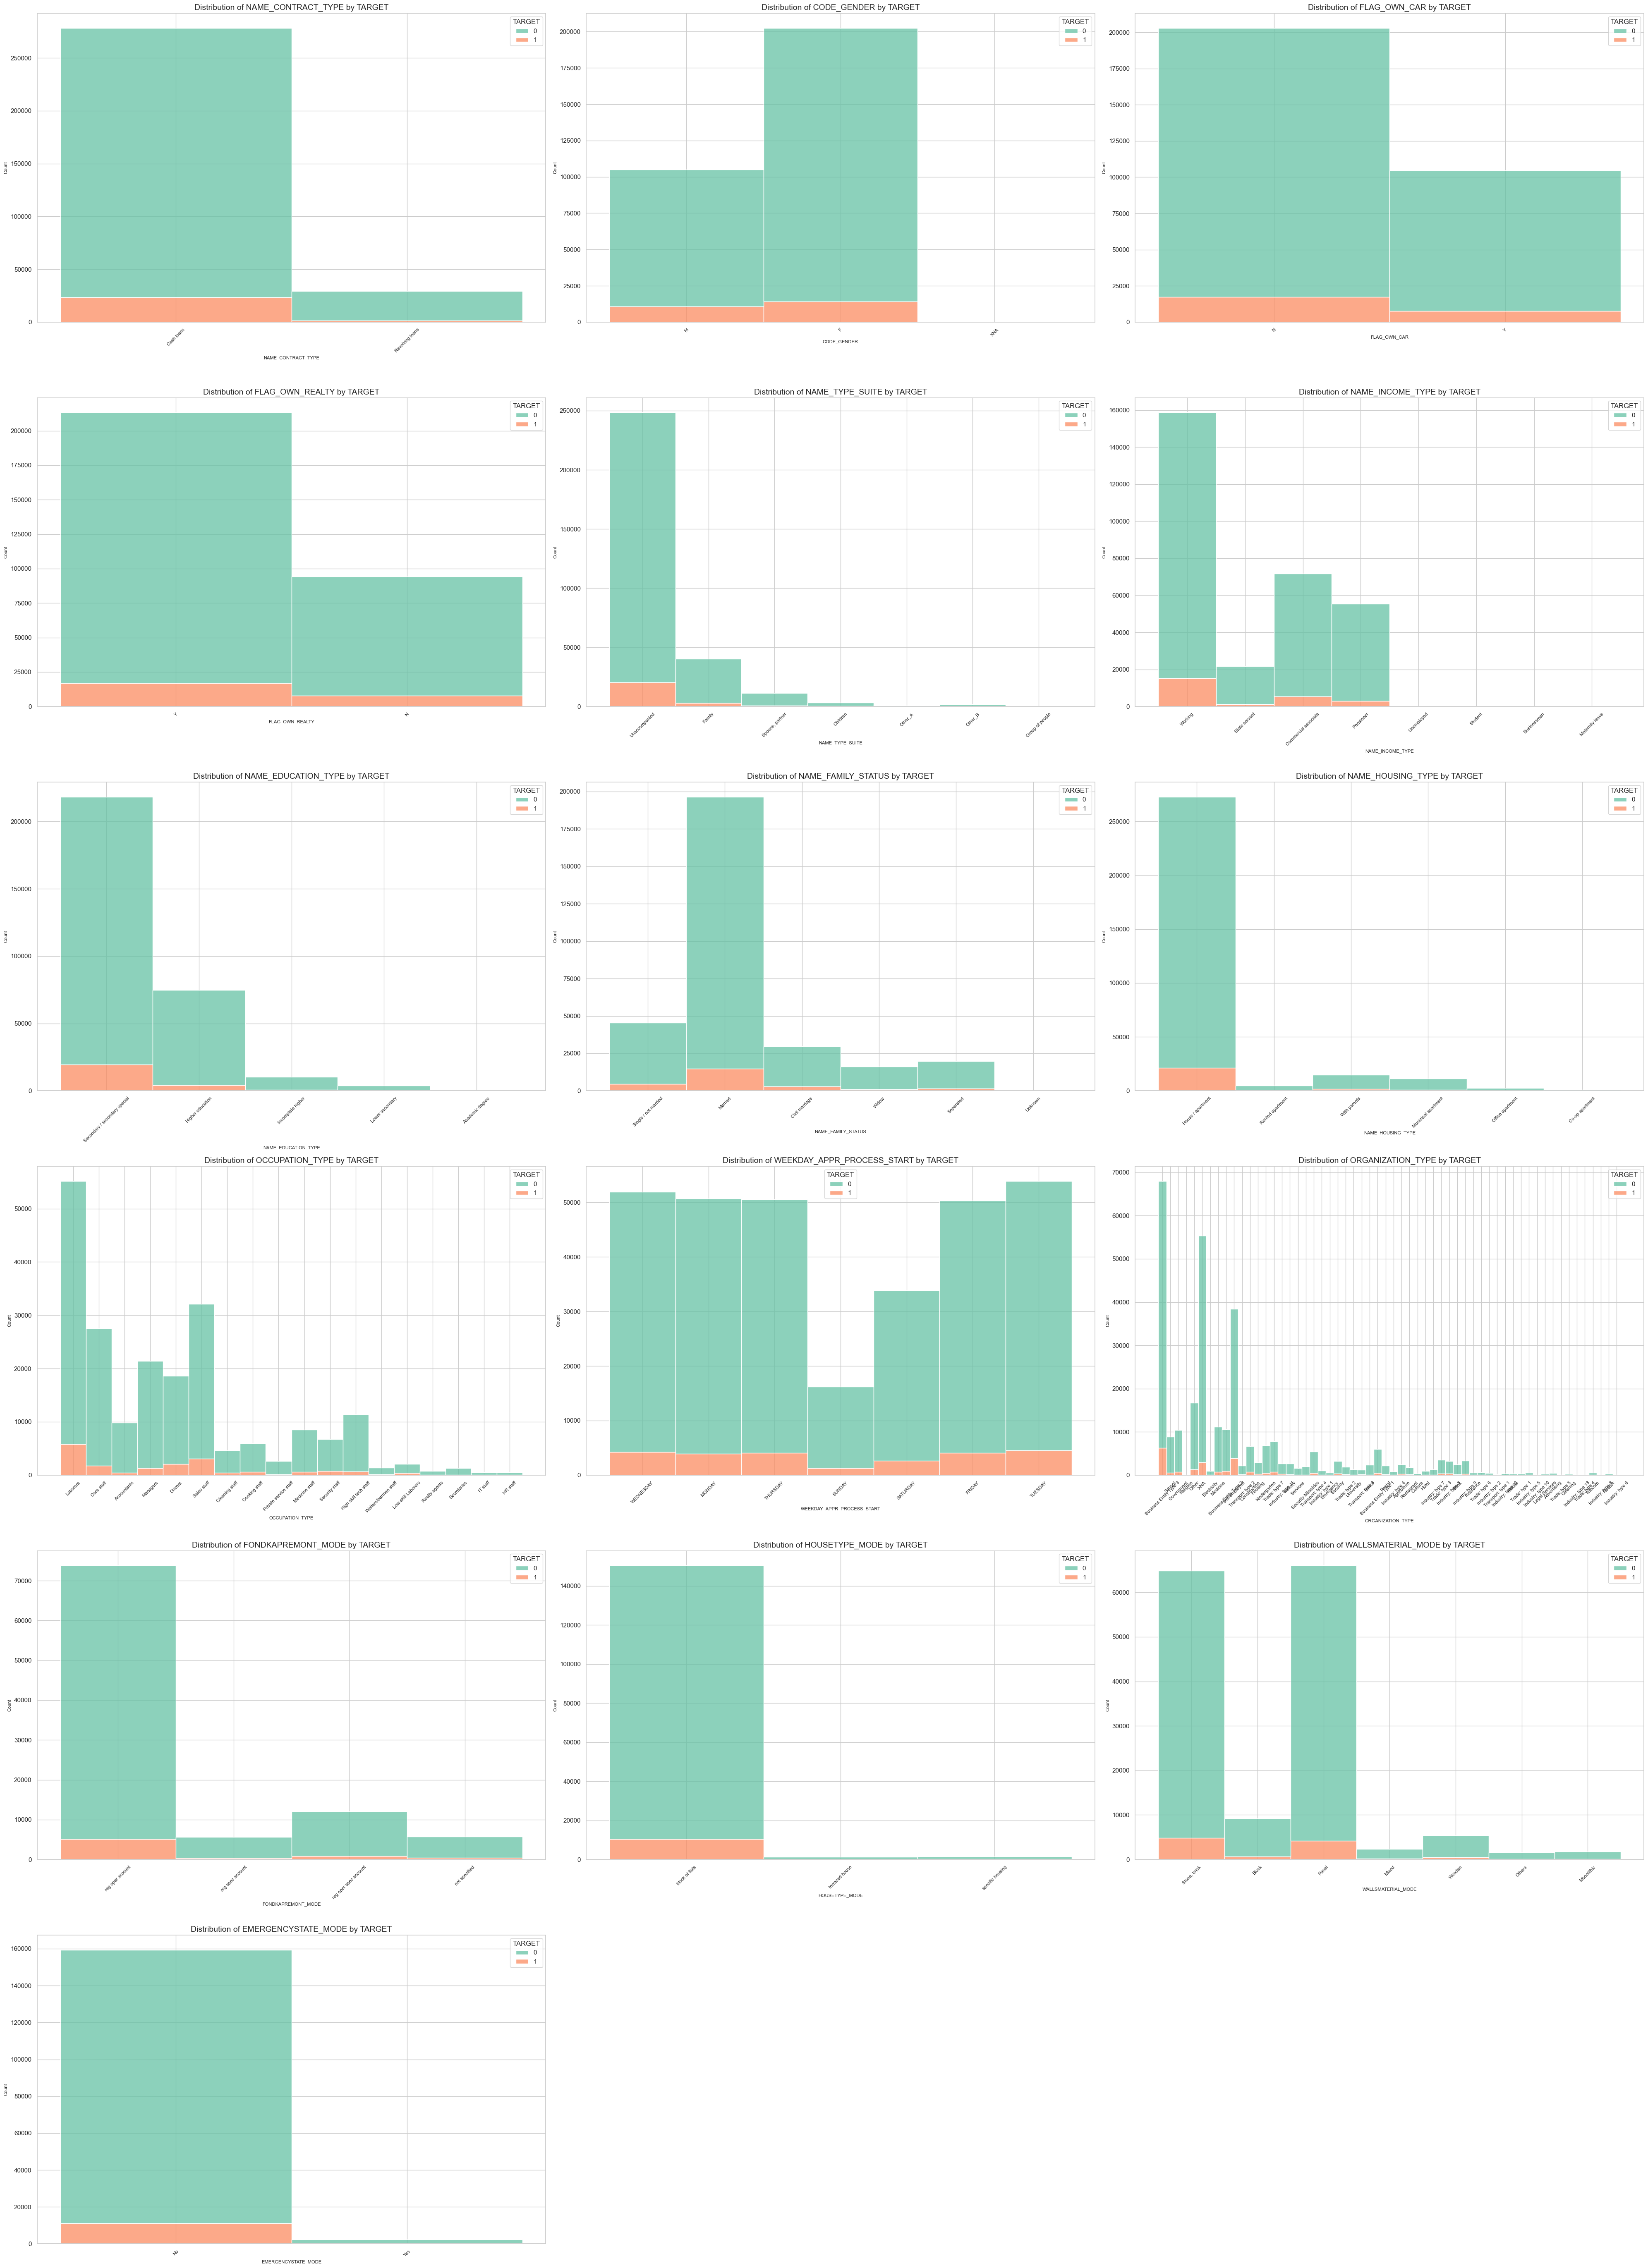

In [165]:
#Multivariate Analysis category plots
import seaborn as sns
import matplotlib.pyplot as plt

# Set style untuk tampilan yang lebih baik
sns.set(style="whitegrid")

# Buat figure yang lebih besar dengan subplots untuk menampilkan beberapa plot sekaligus
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(40, 55))  # 6 baris, 3 kolom
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Atur jarak antar subplot

# Flatten axes untuk memudahkan iterasi
axes = axes.flatten()

# Loop untuk membuat histogram stacked untuk setiap variabel kategorikal dengan hue TARGET
for idx, col in enumerate(categorical):
    sns.histplot(data=data, x=col, hue="TARGET", multiple="stack", ax=axes[idx], palette="Set2", bins=50)
    axes[idx].set_title(f'Distribution of {col} by TARGET', fontsize=14)
    axes[idx].set_xlabel(col, fontsize=8)
    axes[idx].set_ylabel('Count', fontsize=8)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=8)  # Rotasi label x
    
# Hapus subplot yang tidak terpakai jika jumlah plot lebih sedikit dari grid yang dibuat
for ax in axes[len(categorical):]:
    ax.remove()

# Tampilkan plot
plt.tight_layout()
plt.show()


<h2>Multivariate Analysis and Interpretation</h2>

<p>Berikut adalah analisis dan interpretasi dari hasil plot multivariat pada beberapa variabel kategorikal berdasarkan hubungan dengan <em>TARGET</em> (0 = tidak gagal bayar, 1 = gagal bayar) yang memberikan gambaran pola risiko kredit.</p>

<h3>1. NAME_CONTRACT_TYPE</h3>
<ul>
    <li>Pinjaman tunai (<em>Cash loans</em>) sangat mendominasi dengan lebih banyak nasabah tidak gagal bayar (TARGET 0) dibandingkan nasabah yang gagal bayar (TARGET 1).</li>
    <li>Ada indikasi bahwa nasabah yang mengambil <em>Cash loans</em> cenderung lebih berisiko gagal bayar dibandingkan yang mengambil <em>Revolving loans</em>.</li>
</ul>

<h3>2. CODE_GENDER</h3>
<ul>
    <li>Nasabah perempuan lebih banyak dibandingkan laki-laki dalam populasi ini.</li>
    <li>Dari distribusi, baik laki-laki maupun perempuan memiliki pola yang sama, namun laki-laki cenderung sedikit lebih berisiko terhadap gagal bayar.</li>
</ul>

<h3>3. FLAG_OWN_CAR</h3>
<ul>
    <li>Nasabah yang tidak memiliki mobil (<em>N</em>) mendominasi, baik yang gagal bayar maupun tidak.</li>
    <li>Namun, proporsi nasabah yang tidak memiliki mobil dan gagal bayar lebih tinggi dibandingkan dengan yang memiliki mobil.</li>
</ul>

<h3>4. FLAG_OWN_REALTY</h3>
<ul>
    <li>Mayoritas nasabah memiliki properti (<em>Y</em>), dengan mayoritas dari mereka tidak gagal bayar.</li>
    <li>Nasabah yang tidak memiliki properti memiliki risiko gagal bayar yang lebih tinggi dibandingkan yang memiliki properti.</li>
</ul>

<h3>5. NAME_TYPE_SUITE</h3>
<ul>
    <li>Nasabah yang mengajukan pinjaman sendiri (<em>Unaccompanied</em>) mendominasi dan menunjukkan risiko gagal bayar yang lebih tinggi dibandingkan kategori lain.</li>
</ul>

<h3>6. NAME_INCOME_TYPE</h3>
<ul>
    <li>Nasabah yang bekerja memiliki distribusi yang lebih stabil dengan risiko gagal bayar yang lebih rendah dibandingkan dengan kategori lain seperti pensiunan, wiraswasta, dan pengangguran.</li>
    <li>Pensiunan dan pengangguran tampak memiliki risiko gagal bayar yang lebih tinggi.</li>
</ul>

<h3>7. NAME_HOUSING_TYPE</h3>
<ul>
    <li>Nasabah yang tinggal di apartemen rumah tangga (<em>House / apartment</em>) lebih dominan.</li>
    <li>Nasabah yang tinggal dengan orang tua atau di apartemen sewaan memiliki proporsi gagal bayar yang lebih tinggi.</li>
</ul>

<h3>8. NAME_EDUCATION_TYPE</h3>
<ul>
    <li>Mayoritas nasabah memiliki pendidikan menengah, tetapi proporsi gagal bayar lebih tinggi pada kelompok ini.</li>
    <li>Nasabah dengan pendidikan yang lebih tinggi cenderung memiliki risiko gagal bayar lebih rendah.</li>
</ul>

<h3>9. NAME_FAMILY_STATUS</h3>
<ul>
    <li>Nasabah yang sudah menikah merupakan kelompok terbesar, namun ada distribusi gagal bayar yang lebih tinggi pada kelompok lajang atau yang tidak menikah.</li>
</ul>

<h3>10. OCCUPATION_TYPE</h3>
<ul>
    <li>Tenaga kerja kasar (<em>Laborers</em>) merupakan kelompok pekerjaan terbesar dengan risiko gagal bayar yang lebih tinggi dibandingkan dengan pekerjaan lain seperti staf inti, akuntan, dan manajer.</li>
    <li>Staf keamanan dan staf pembersih juga memiliki proporsi gagal bayar yang signifikan.</li>
</ul>

<h3>11. WEEKDAY_APPR_PROCESS_START</h3>
<ul>
    <li>Distribusi hari dalam minggu proses aplikasi menunjukkan pola yang relatif seragam, namun hari Sabtu tampaknya memiliki proporsi gagal bayar yang lebih tinggi dibandingkan hari lainnya.</li>
</ul>

<h3>12. FONDKAPREMONT_MODE</h3>
<ul>
    <li>Mayoritas nasabah memiliki mode renovasi dengan akun operasi reguler (<em>reg oper account</em>), tetapi risiko gagal bayar lebih tinggi pada kelompok yang menggunakan mode spesifik lain.</li>
</ul>

<h3>13. HOUSETYPE_MODE</h3>
<ul>
    <li>Nasabah yang tinggal di apartemen (<em>block of flats</em>) mendominasi dataset dan menunjukkan proporsi gagal bayar yang lebih tinggi dibandingkan kategori lain.</li>
</ul>

<h3>14. ORGANIZATION_TYPE</h3>
<ul>
    <li>Industri perdagangan, konstruksi, dan transportasi menunjukkan proporsi nasabah gagal bayar yang lebih tinggi.</li>
    <li>Bisnis entitas tipe 3 memiliki jumlah nasabah terbesar, namun proporsi gagal bayarnya lebih rendah dibandingkan beberapa kategori lainnya.</li>
</ul>

<h3>15. WALLSMATERIAL_MODE</h3>
<ul>
    <li>Mayoritas nasabah tinggal di rumah dengan dinding panel atau blok.</li>
    <li>Nasabah yang tinggal di rumah dengan dinding dari panel memiliki proporsi gagal bayar yang lebih tinggi dibandingkan dengan jenis dinding lainnya.</li>
</ul>

<h3>16. EMERGENCYSTATE_MODE</h3>
<ul>
    <li>Mayoritas nasabah berada dalam keadaan non-darurat, dan hanya sebagian kecil yang berada dalam keadaan darurat. Namun, mereka yang berada dalam keadaan darurat memiliki risiko gagal bayar yang sedikit lebih tinggi.</li>
</ul>

<h3>Kesimpulan</h3>
<p>Faktor-faktor seperti jenis kontrak, status pekerjaan, pendidikan, kepemilikan aset, dan kondisi tempat tinggal memengaruhi risiko gagal bayar kredit. Profil nasabah dengan latar belakang yang kurang stabil, seperti tidak memiliki properti, bekerja di sektor informal, atau memiliki pendidikan rendah, cenderung lebih berisiko gagal bayar. Kebijakan mitigasi risiko dapat difokuskan pada segmen-segmen ini untuk mengurangi risiko gagal bayar.</p>


<h2>Korelasi Utama:</h2>

<ul>
    <li><strong>Jenis Kontrak dan Risiko Kredit:</strong> Cash loans terlihat memiliki korelasi yang kuat dengan risiko kredit macet.</li>
    <li><strong>Kepemilikan Aset dan Risiko Kredit:</strong> Nasabah yang tidak memiliki aset (mobil dan properti) lebih mungkin untuk mengalami default, menunjukkan korelasi negatif antara kepemilikan aset dan risiko kredit.</li>
    <li><strong>Tipe Pendapatan dan Risiko Kredit:</strong> Pendapatan yang berasal dari pekerjaan stabil cenderung memiliki korelasi negatif dengan risiko kredit, sedangkan pendapatan dari pensiun atau usaha cenderung memiliki korelasi positif.</li>
    <li><strong>Pendidikan dan Risiko Kredit:</strong> Nasabah dengan pendidikan rendah lebih rentan terhadap risiko kredit, menunjukkan korelasi yang cukup signifikan antara tingkat pendidikan dan risiko default.</li>
</ul>

<h3>Dari hasil analisis ini, dapat disimpulkan bahwa:</h3>

<ul>
    <li>Segmentasi nasabah berdasarkan jenis kontrak, aset, pendapatan, pendidikan, dan profesi sangat penting dalam pengelolaan risiko kredit.</li>
    <li>Kebijakan risiko yang lebih ketat diperlukan untuk kelompok nasabah yang mengambil "Cash loans", yang tidak memiliki aset, atau yang berpendidikan rendah.</li>
</ul>


<h3>Kesimpulan Umum:</h3>
<p>
   Variabel seperti <strong>jenis kontrak, gender, tipe pekerjaan, sumber pendapatan, dan tingkat pendidikan</strong> adalah faktor penting yang mempengaruhi nasabah jatuh ke dalam <strong>TARGET 1</strong> (kredit macet). Strategi mitigasi risiko dan segmentasi nasabah dapat difokuskan pada variabel-variabel ini.
</p>


<h3>Business Insights:</h3>

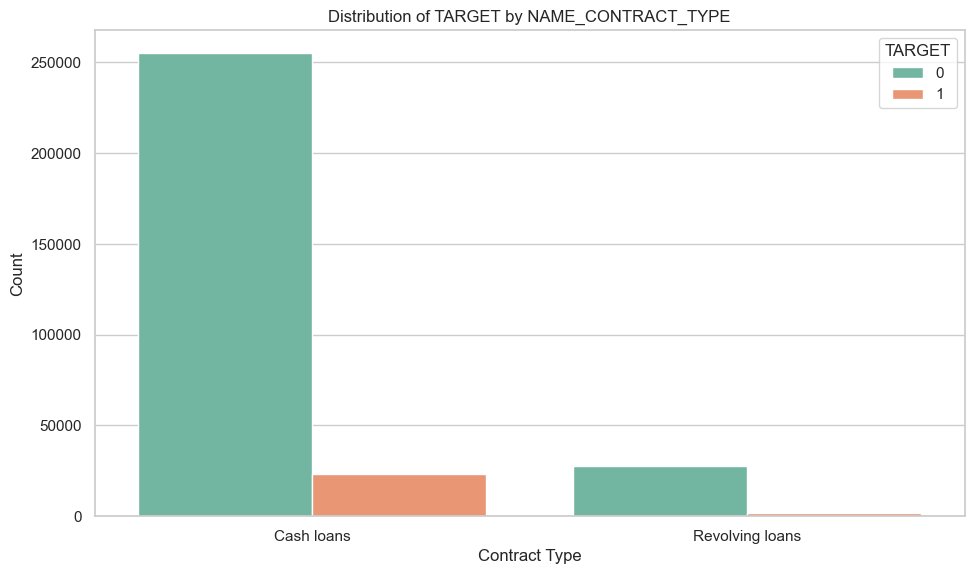

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style untuk tampilan yang lebih baik
sns.set(style="whitegrid")

# 1. Pengelolaan Risiko Berdasarkan Jenis Kontrak
plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_CONTRACT_TYPE", hue="TARGET", data=data, palette="Set2")
plt.title("Distribution of TARGET by NAME_CONTRACT_TYPE")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()


<ul>
   <li><strong>Pengelolaan Risiko Berdasarkan Jenis Kontrak:</strong> Fokus pada "Cash loans" untuk penilaian risiko yang lebih ketat.</li>

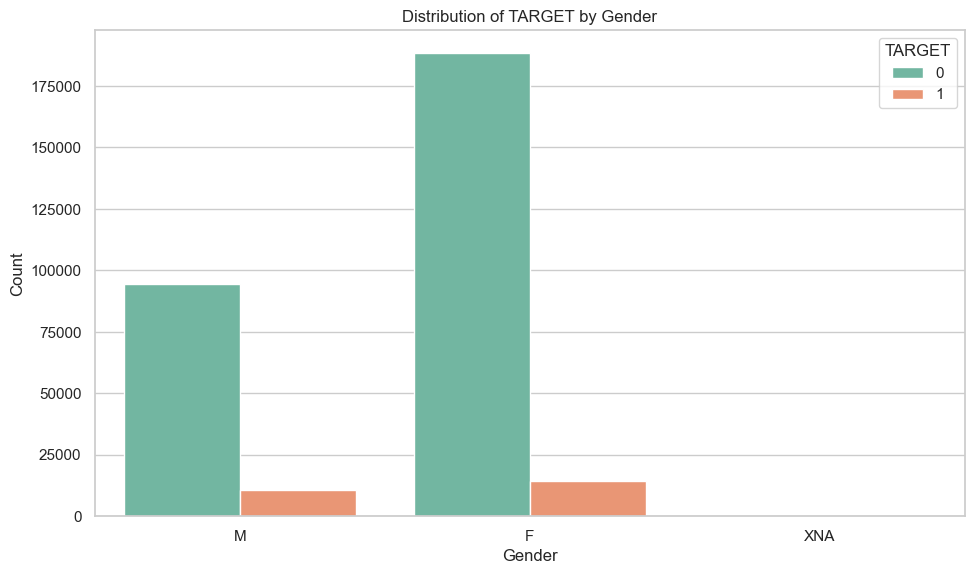

In [144]:
# 2. Pemetaan Gender dan Risiko
plt.figure(figsize=(10, 6))
sns.countplot(x="CODE_GENDER", hue="TARGET", data=data, palette="Set2")
plt.title("Distribution of TARGET by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

   <li><strong>Pemetaan Gender dan Risiko:</strong> Pelanggan perempuan tampaknya memiliki sedikit peningkatan risiko macet, perlu kebijakan risiko yang lebih sensitif terhadap segmen ini.</li>

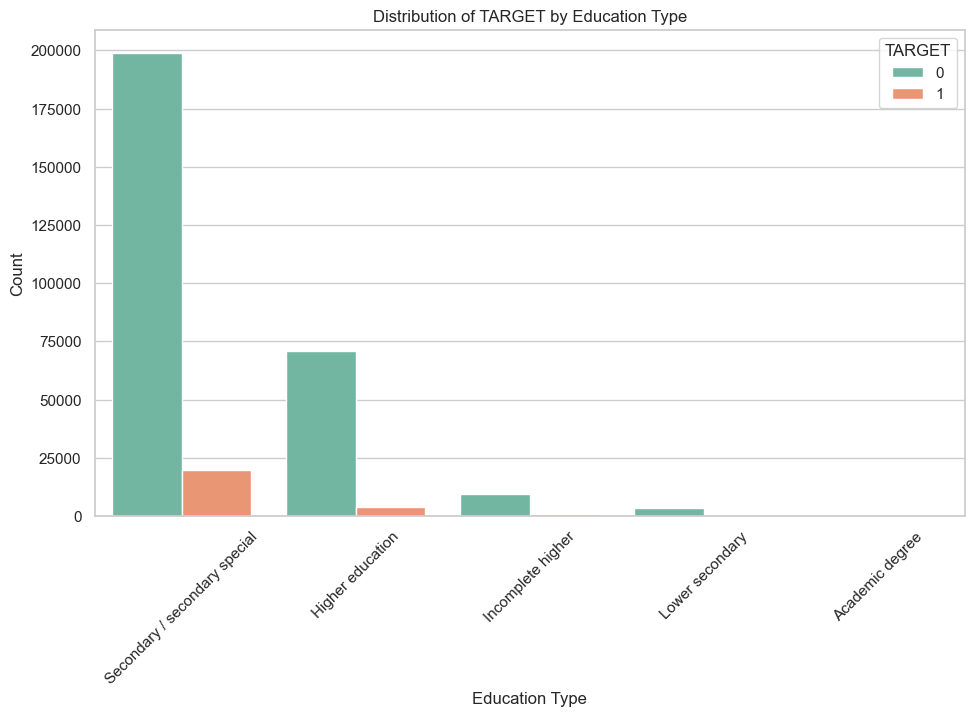

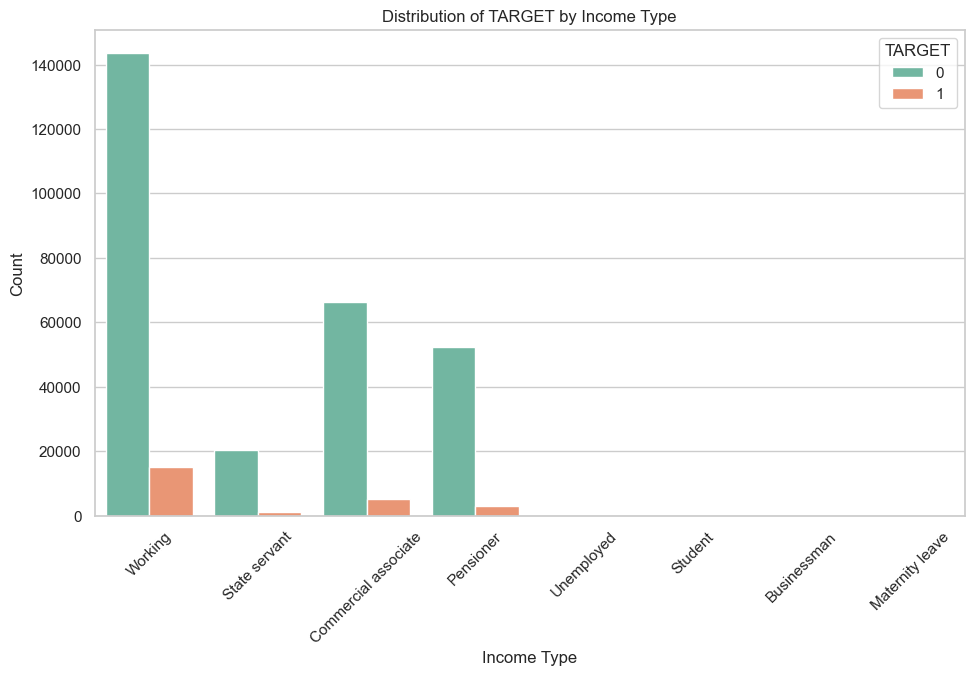

In [146]:
# 3. Profil Pendidikan dan Pendapatan
plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_EDUCATION_TYPE", hue="TARGET", data=data, palette="Set2")
plt.title("Distribution of TARGET by Education Type")
plt.xlabel("Education Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=data, palette="Set2")
plt.title("Distribution of TARGET by Income Type")
plt.xlabel("Income Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

   <li><strong>Profil Pendidikan dan Pendapatan:</strong> Nasabah dengan pendidikan rendah dan pendapatan dari pensiun memerlukan seleksi yang lebih teliti.</li>

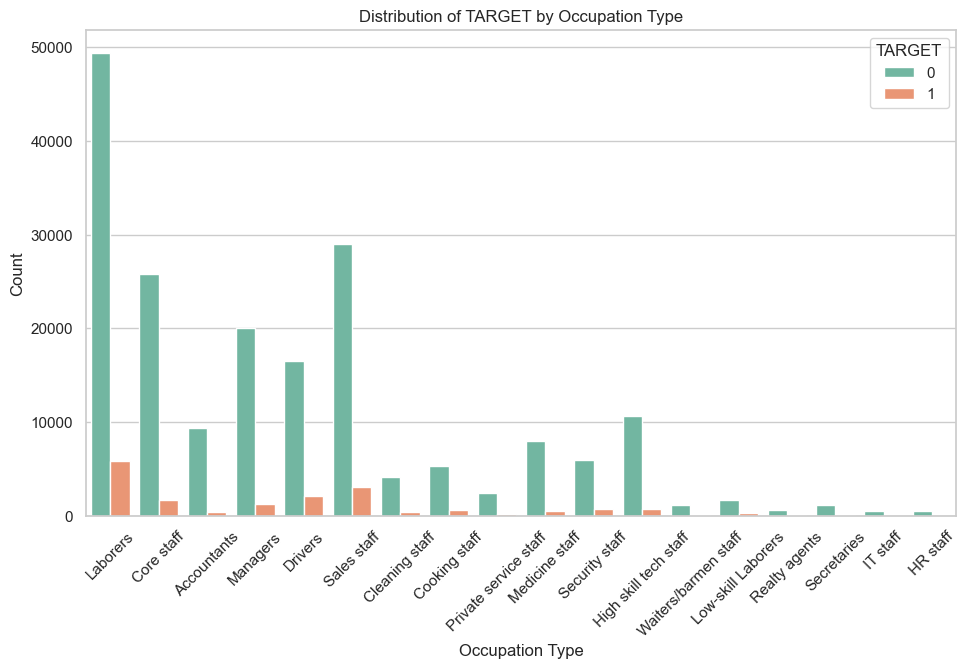

In [148]:
# 4. Segmen Pekerjaan
plt.figure(figsize=(10, 6))
sns.countplot(x="OCCUPATION_TYPE", hue="TARGET", data=data, palette="Set2")
plt.title("Distribution of TARGET by Occupation Type")
plt.xlabel("Occupation Type")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

   <li><strong>Segmen Pekerjaan:</strong> Profesi seperti "Laborers" memiliki risiko kredit lebih tinggi, strategi mitigasi risiko perlu diperkuat untuk segmen ini.</li>
</ul>